In [1]:
%load_ext autoreload
%autoreload 2

import os
from travel import init_travel
init_travel()

# Load preds

In [2]:
import json

RESULTS_PATH = "/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/VQG2VQA_ego4d_llava-1.5-7b-hf_20240602092211/preds_nli_val.json"
preds = json.load(open(RESULTS_PATH, "r"))

# Visualize some outputs

In [3]:
import random

output_indices_to_visualize = random.sample(list(range(len(preds))), 10)

/home/sstorks/.cache/pypoetry/virtualenvs/travel-nQET-zRt-py3.10/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


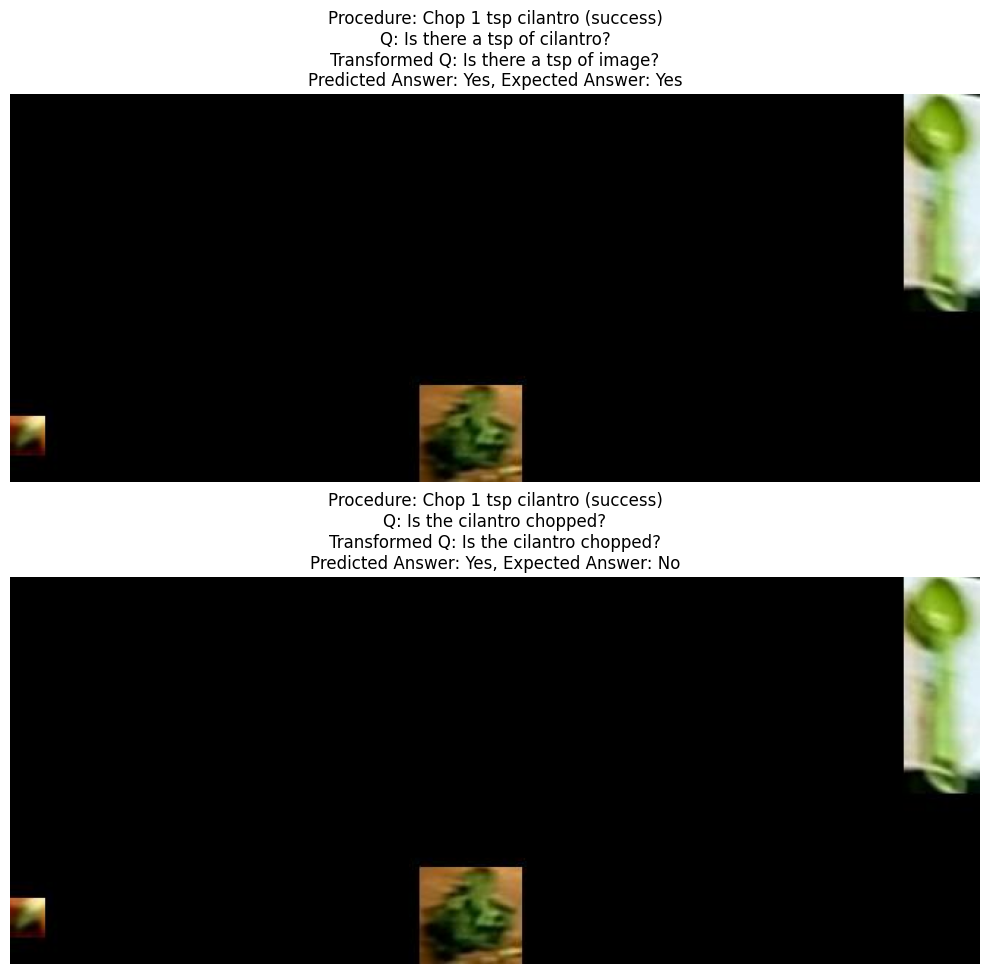

mistake_probs:
[[0.0, 0.0]]
nli_relevance_probs:
[[-0.7099999785423279, -0.9710000157356262]]
nli_mistake_probs:
[[0.2879999876022339, 0.027000000700354576]]


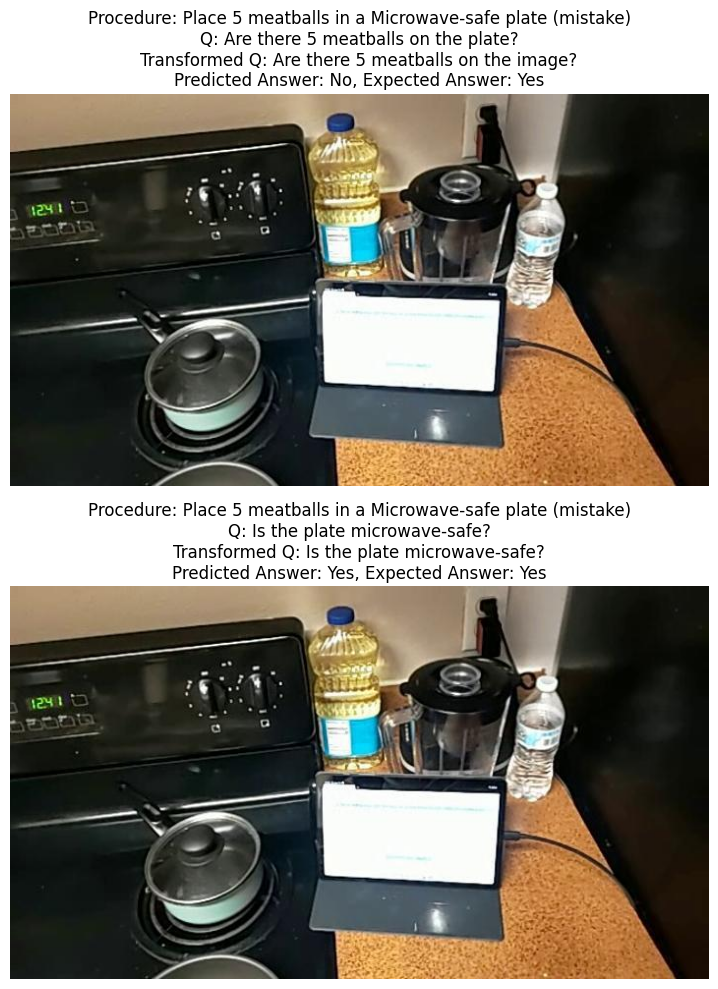

mistake_probs:
[[0.8809999823570251, 0.0]]
nli_relevance_probs:
[[0.953000009059906, -0.7870000004768372]]
nli_mistake_probs:
[[0.9929999709129333, 0.21199999749660492]]


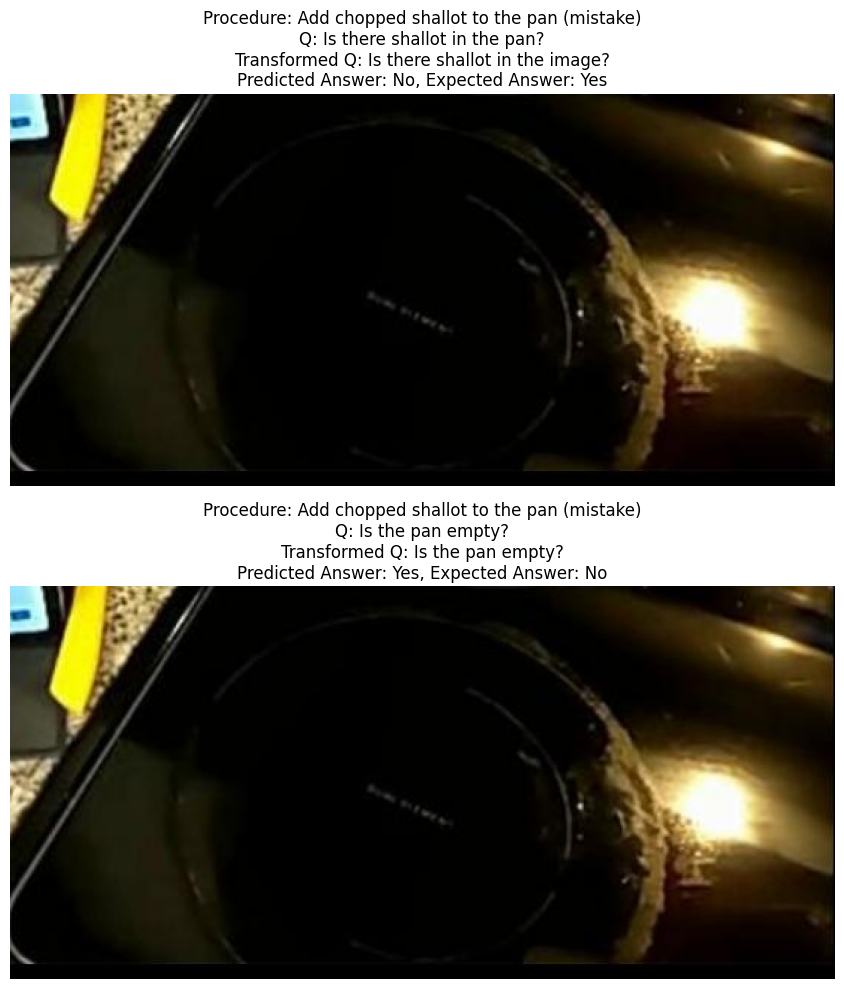

mistake_probs:
[[0.8600000143051147, 0.0]]
nli_relevance_probs:
[[0.9610000252723694, 0.020999999716877937]]
nli_mistake_probs:
[[0.9919999837875366, 0.7879999876022339]]


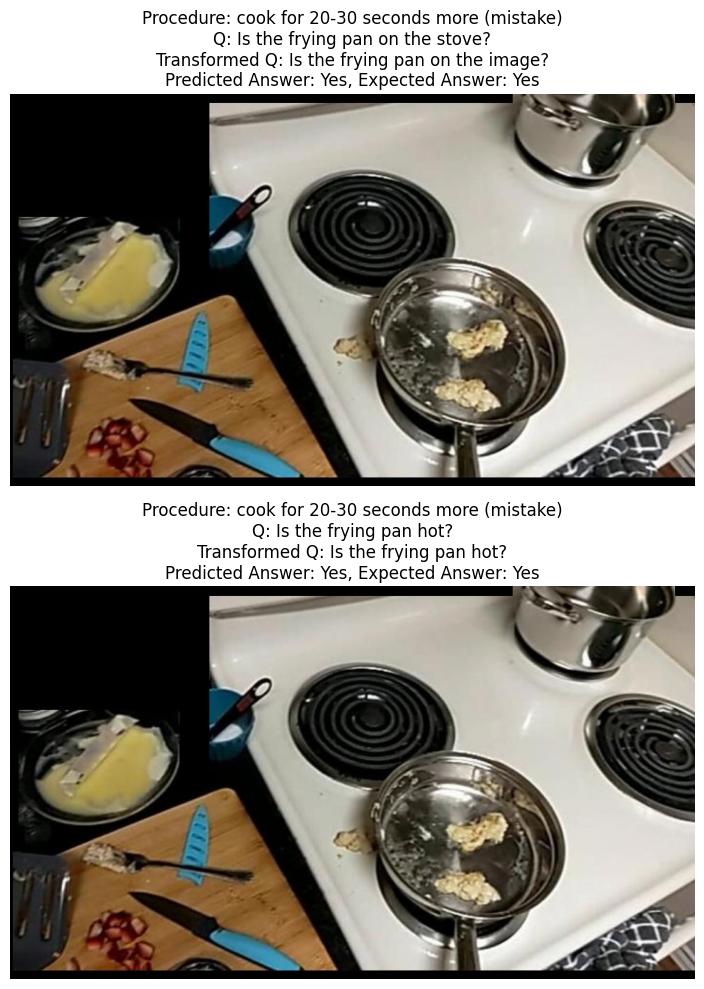

mistake_probs:
[[0.0, 0.0]]
nli_relevance_probs:
[[-0.8090000152587891, -0.6420000195503235]]
nli_mistake_probs:
[[0.08299999684095383, 0.12700000405311584]]


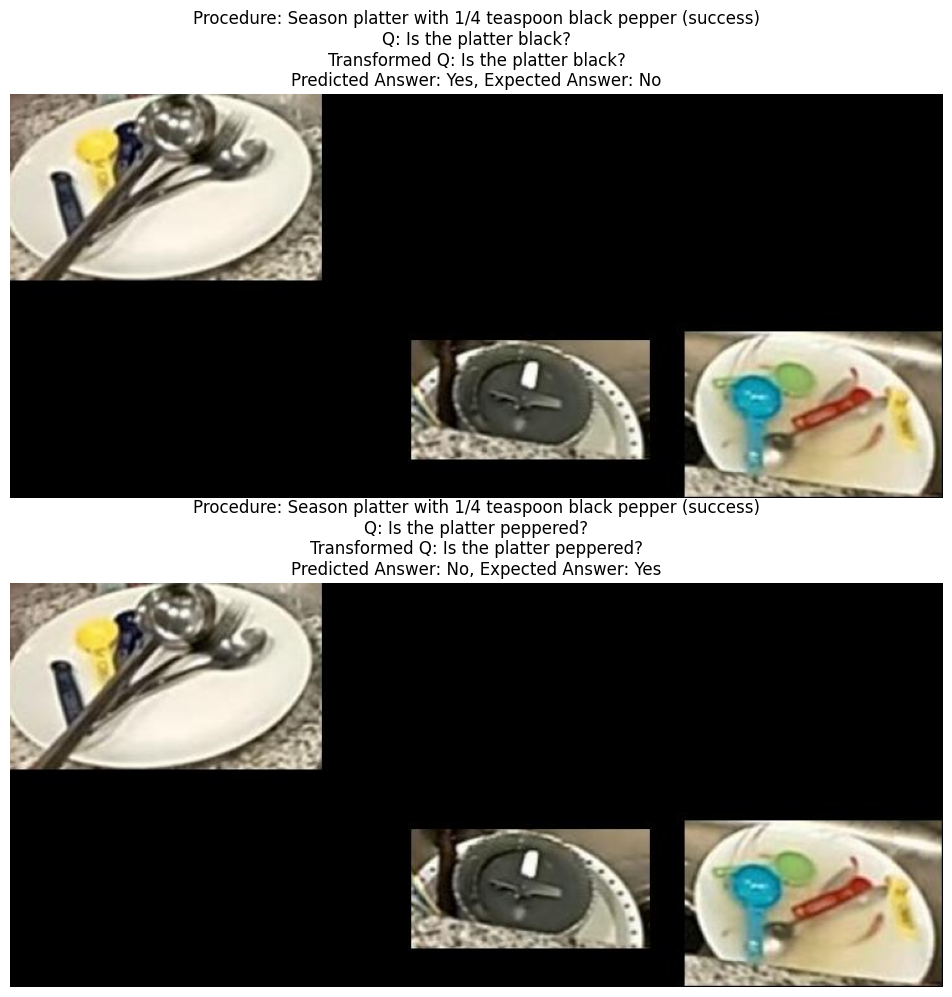

mistake_probs:
[[0.0, 0.8190000057220459]]
nli_relevance_probs:
[[-0.9359999895095825, 0.9729999899864197]]
nli_mistake_probs:
[[0.04699999839067459, 0.9869999885559082]]


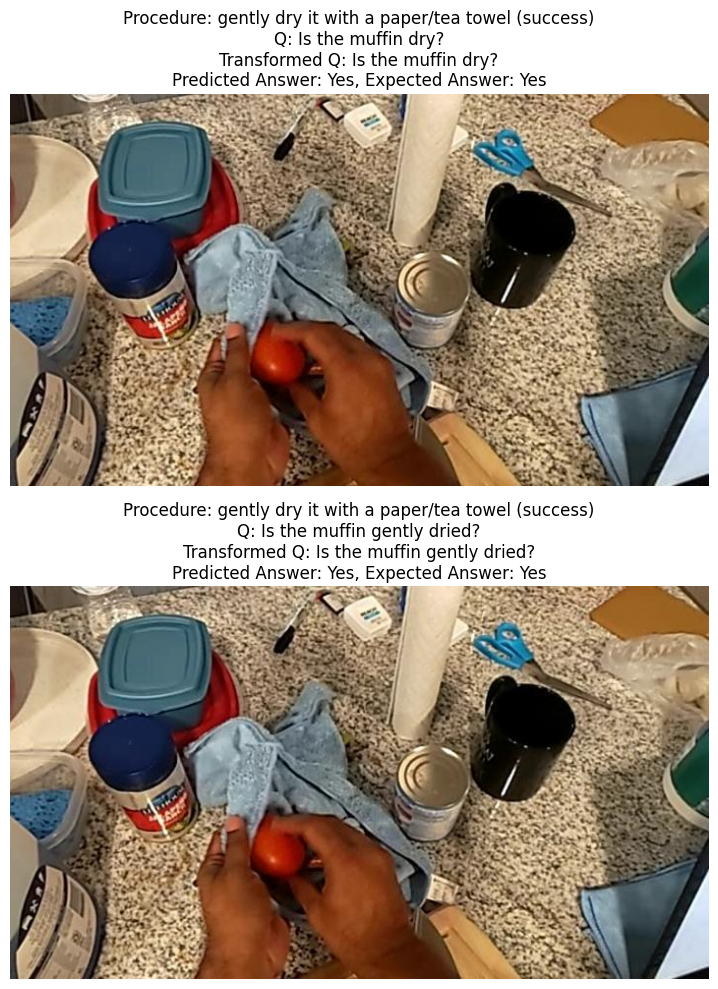

mistake_probs:
[[0.0, 0.0]]
nli_relevance_probs:
[[-0.8740000128746033, -0.9810000061988831]]
nli_mistake_probs:
[[0.12300000339746475, 0.017000000923871994]]


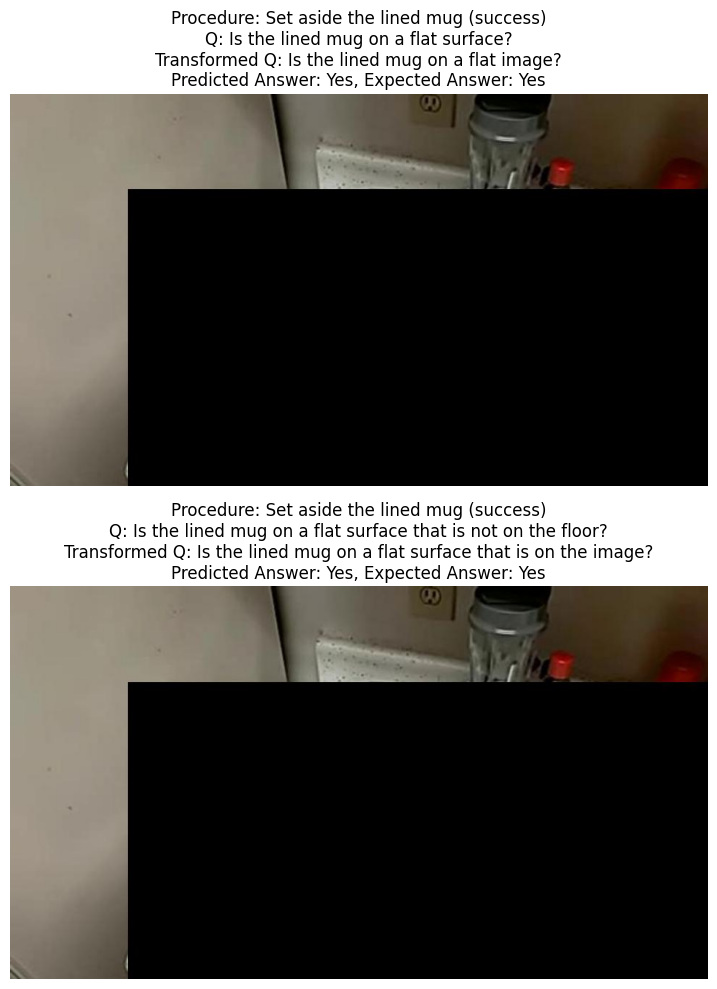

mistake_probs:
[[0.0, 0.0]]
nli_relevance_probs:
[[-0.7720000147819519, -0.8090000152587891]]
nli_mistake_probs:
[[0.13500000536441803, 0.09300000220537186]]


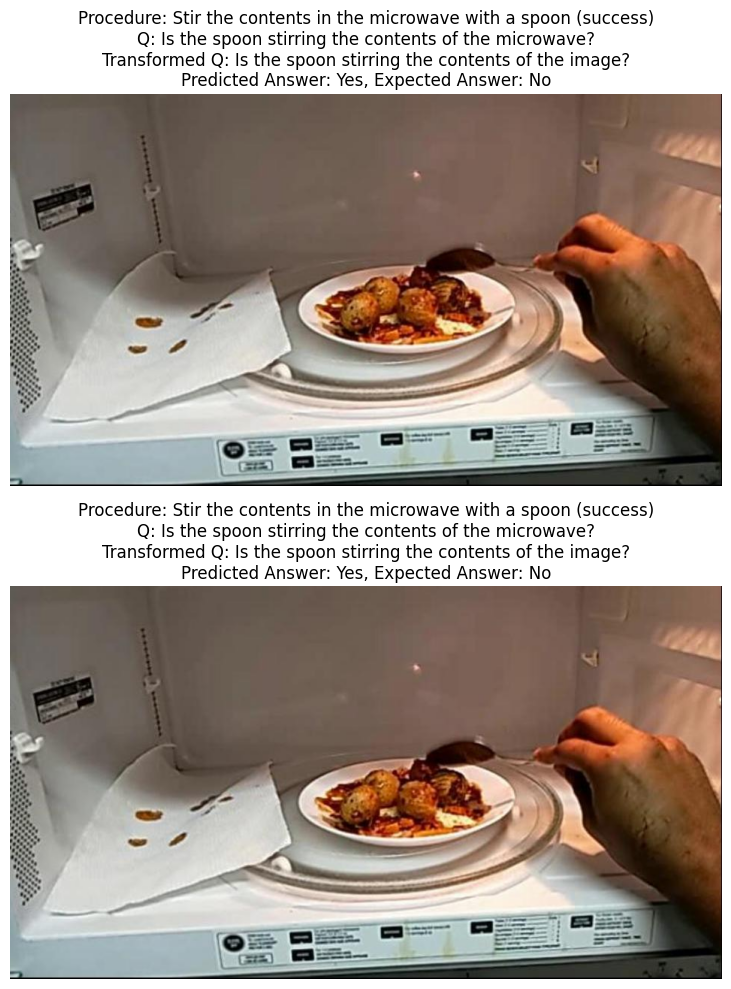

mistake_probs:
[[0.0, 0.0]]
nli_relevance_probs:
[[-0.9769999980926514, -0.9769999980926514]]
nli_mistake_probs:
[[0.01600000075995922, 0.01600000075995922]]


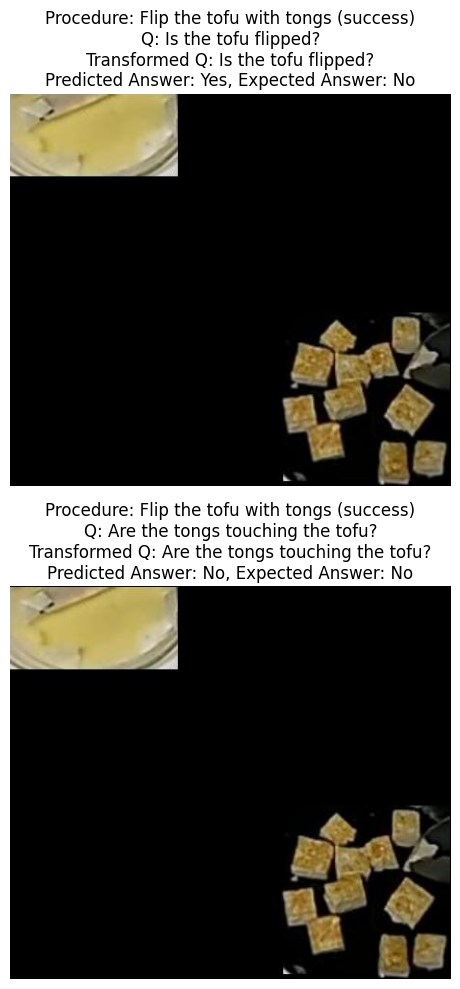

mistake_probs:
[[0.0, 0.32199999690055847]]
nli_relevance_probs:
[[-0.9330000281333923, 0.625]]
nli_mistake_probs:
[[0.06599999964237213, 0.8130000233650208]]


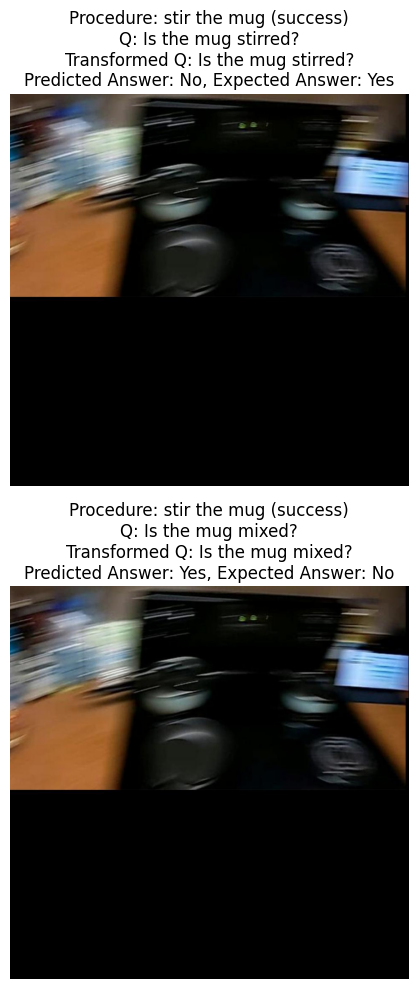

mistake_probs:
[[0.5889999866485596, 0.0]]
nli_relevance_probs:
[[0.9710000157356262, -0.9110000133514404]]
nli_mistake_probs:
[[0.9879999756813049, 0.04399999976158142]]


In [4]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint

from travel.model.vqa import VQAResponse

# TODO: some bugs need to be fixed in VQA

keys = list(preds.keys())
for output_idx in output_indices_to_visualize:
    pred = preds[keys[output_idx]]

    procedure_description = pred['example']['procedure_description']
    mistake = pred["example"]["mistake"]

    # Extract the vqa list - just take the questions and answers for last frame
    vqa_list = pred['vqa'][-1]

    # Create a figure with a subplot for each entry
    num_entries = len(vqa_list)
    fig, axs = plt.subplots(num_entries, 1, figsize=(10, 5 * num_entries))

    for i, entry in enumerate(vqa_list):
        if 'frame' in entry:
            ax = axs[i] if num_entries > 1 else axs
            img = mpimg.imread(entry['frame'])
            ax.imshow(img)
            ax.axis('off')
        
        question = entry['question']
        prompt = entry['prompt'].split("USER: <image>")[1].split("ASSISTANT:")[0].strip()
        predicted_answer = entry['predicted_answer']
        expected_answer = entry['expected_answer']
        
        title = f"Procedure: {procedure_description} ({'mistake' if mistake else 'success'})\n"
        title += f"Q: {question}\n"
        title += f"Transformed Q: {prompt}\n"
        title += f"Predicted Answer: {VQAResponse(predicted_answer).name}, Expected Answer: {VQAResponse(expected_answer).name}"
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

    # Print out probabilities
    for k in ["mistake_probs", "nli_relevance_probs", "nli_mistake_probs"]:
        print(k + ":")
        pprint(pred['mistake_detection']["0.0"][k])    